In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import random
import seaborn as sns
import pandas as pd

In [7]:
ds=pd.read_csv('twitter_data copy.csv',error_bad_lines=False)
data=np.array(ds)

In [8]:
ds.head()

,tweet,user_name,country,user_location,language
0,i liked a video amber rose claims she was cons...,LY NoStress,NONE,NONE,en
1,this situation around coutinho is just embarra...,David,NONE,NONE,en
2,evidence hacked theresistance trumprussia rus...,,NONE,St Paul MN,en
3,,Keswin Suresh,India,Ahmadabad City India,und
4,great synopsis,Ade Hiley,United Kingdom,Sheffield UK,en


In [18]:
a=pd.read_csv('twitter_data copy.csv')
a.head()

,tweet,user_name,country,user_location,language
0,i liked a video amber rose claims she was cons...,LY NoStress,NONE,NONE,en
1,this situation around coutinho is just embarra...,David,NONE,NONE,en
2,evidence hacked theresistance trumprussia russ...,,NONE,USA,en
3,like sorry an abused woman at the hands of a m...,hales,United States,USA,en
4,find it funny when you see lads who get bullie...,Louis Ralston,United Kingdom,UK,en


In [20]:
temp=a['user_location'].value_counts()

In [23]:
print temp

NONE            255
USA             164
UK               38
Canada            9
India             7
Australia         6
Nigeria           5
South Africa      5
Ireland           3
Scotland          3
New Zealand       2
Malaysia          2
Spain             2
Singapore         2
Kenya             1
Chile             1
Saudi Arabia      1
Jordon            1
Switzerland       1
Belgium           1
Norway            1
Mexico            1
Germany           1
UK                1
Name: user_location, dtype: int64


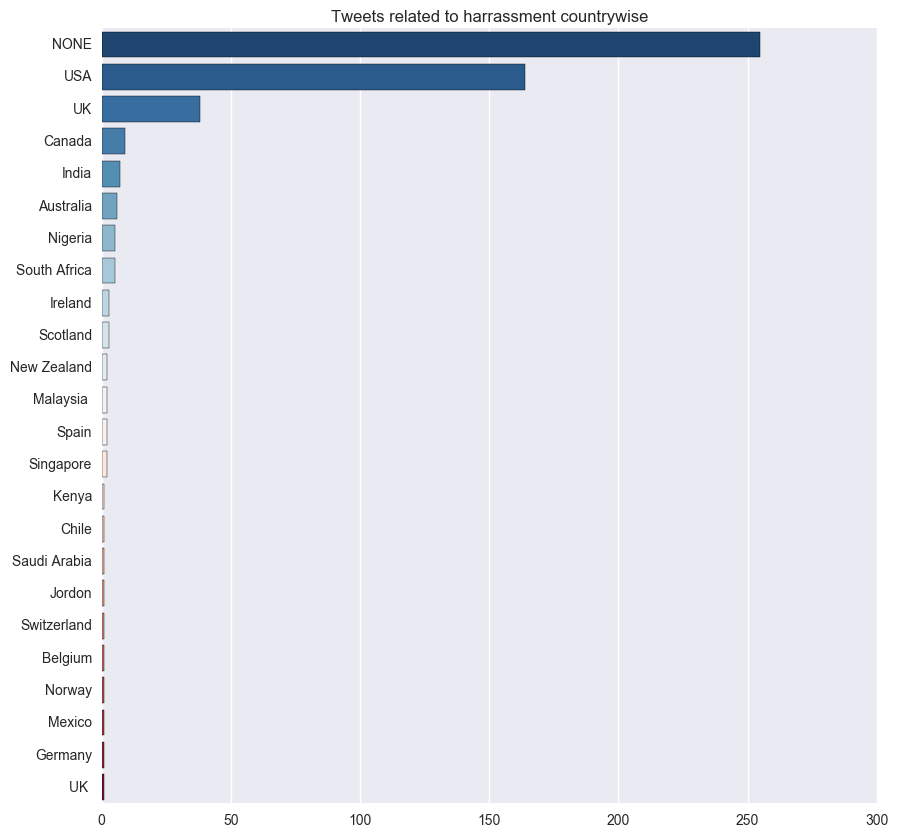

In [24]:
x=[]
y=[]
for ix in temp.get_values():
    for j in range(len(temp[temp==ix].index)):
        x.append(temp[temp==ix].index[j])
        y.append(ix)
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y,x,palette="RdBu_r")
plt.title('Tweets related to harrassment countrywise')
plt.show()

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sid=SIA()

In [40]:
neg_count=0
pos_count=0
neu_count=0
senti=[]
for i in range(513):
    temp=sid.polarity_scores(a['tweet'][i])
    if(temp['neg']>temp['pos'] and temp['neg']>temp['neu']):
        neg_count+=1
        senti.append('neg')
    if(temp['pos']>temp['neg'] and temp['pos']>temp['neu']):
        pos_count+=1
        senti.append('pos')
    if(temp['neu']>temp['neg'] and temp['neu']>temp['pos']):
        neu_count+=1
        senti.append('neu')

In [43]:
print 'Neg : ',neg_count,"  Perc : ",(neg_count/5.13),'%'
print 'Pos : ',pos_count,"   Perc : ",(pos_count/5.13),'%'
print 'Neu : ',neu_count," Perc : ",(neu_count/5.13),'%'

Neg :  47   Perc :  9.16179337232 %
Pos :  3    Perc :  0.584795321637 %
Neu :  460  Perc :  89.6686159844 %


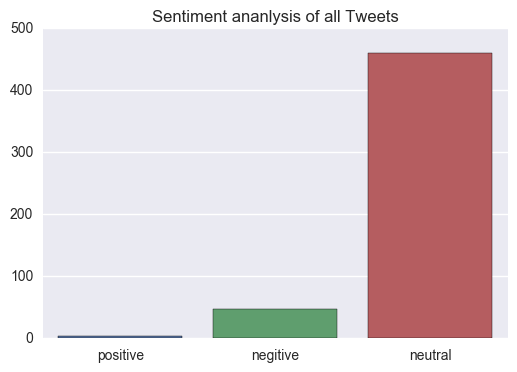

In [70]:
sentiment=[pos_count,neg_count,neu_count]
sns.barplot(['positive','negitive','neutral'],sentiment)
plt.title('Sentiment ananlysis of all Tweets')
plt.show()